In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import scipy.stats as stats
import numpy as np
import pickle

# GCP

In [2]:
fGCB = './../../Prelim_Data_Analysis/gcb_data/budget.csv'
df = pd.read_csv(fGCB,
                 index_col=0,
                 usecols=[0,4,5])
df.head()

,ocean sink,land sink
Year,,
1959,0.852376,0.516073
1960,0.819017,1.394030
1961,0.714842,0.605098
1962,0.756709,1.348349
1963,0.904997,0.877794


In [3]:
fCO2 = './../co2_temp_data/co2_global.csv'
CO2 = pd.read_csv(fCO2, index_col=0)[2:]
CO2.head()

,CO2
Year,
1959,315.486
1960,316.163
1961,316.856
1962,317.558
1963,318.268


In [4]:
df['CO2'] = CO2
df['land sink'] = -df['land sink']
df['ocean sink'] = -df['ocean sink']
df.head()

,ocean sink,land sink,CO2
Year,,,
1959,-0.852376,-0.516073,315.486
1960,-0.819017,-1.394030,316.163
1961,-0.714842,-0.605098,316.856
1962,-0.756709,-1.348349,317.558
1963,-0.904997,-0.877794,318.268


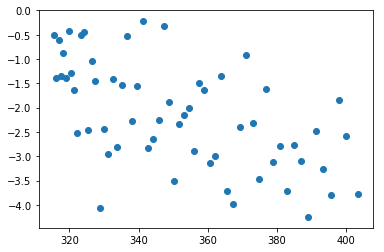

In [5]:
plt.scatter(df.CO2, df['land sink'])

In [25]:
def rolling_trend(data, sink='land sink', window=10, r_plot=False):
    
    data = data[['CO2', sink]]
    
    roll_values = []
    r_values = []
    
    for i in range(0,59-window):
        df = data.iloc[i:i+window+1]
        stats_info = stats.linregress(df['CO2'], df[sink])
        roll_values.append(stats_info[0])
        r_values.append(stats_info[2])
        
    data.plot(x='CO2', y=sink)
    plt.ylabel('C flux to the atmosphere (GtC)')
    
    roll_df = pd.DataFrame({f'{window}-year trend slope': roll_values}, index=data.index[:-window])
    roll_df.plot(color='g')
    plt.ylabel('Slope of C flux trend (GtC/ppm/yr)')
    
    if r_plot:
        r_df = pd.DataFrame({'r-values of trends': r_values}, index=data.index[:-window])
        r_df.plot(color='k')
        plt.ylabel('r-value of slope')
        return roll_df, r_df
    
    return roll_df

In [26]:
p=df[['CO2', 'land sink']].iloc[0+30:11+30]
stats.linregress(p['CO2'], p['land sink'])

LinregressResult(slope=-0.005417868961787683, intercept=-0.5350958220890221, rvalue=-0.03322924755327476, pvalue=0.92273493139601, stderr=0.054318382902907913)

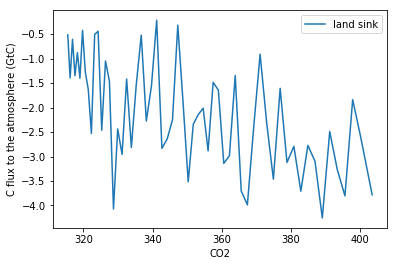

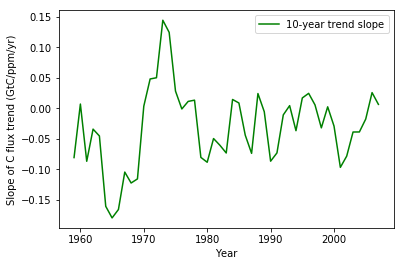

In [27]:
land_10_co2=rolling_trend(df, sink='land sink', window=10)

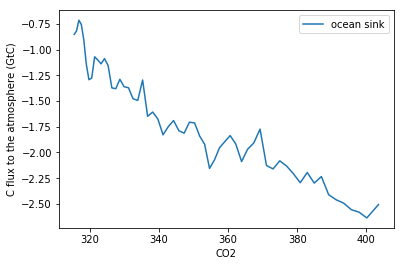

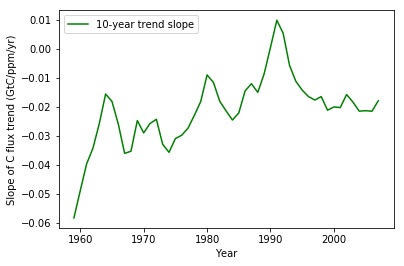

In [28]:
ocean_10_co2=rolling_trend(df, sink='ocean sink', window=10)

In [29]:
stats.linregress(land_10_co2.index, land_10_co2.values.squeeze())

LinregressResult(slope=0.0009637414015673669, intercept=-1.9424881388409656, rvalue=0.21011104389129556, pvalue=0.1473263623081703, stderr=0.0006541213735318006)

In [30]:
stats.linregress(ocean_10_co2.index, ocean_10_co2.values.squeeze())

LinregressResult(slope=0.000495604614004773, intercept=-1.0039156907116498, rvalue=0.584013749971374, pvalue=1.0570682001171836e-05, stderr=0.0001004806188519783)